# Working with Data

One of the most important aspects of designing any machine learning system is to __understand your data__. In this notebook, we're going to load and visualize some very basic datasets so that you understand some of the various tools available to you in Python for working with data. You should __always try to visualize your data__ before you use it in any type of algorithm. First we will look at a random dataset, and then we'll use `sklearn` to study the Iris dataset and other famous datasets.

_Note: some code segments have TODO comments in them. These comments are optional exercises for you to modify the code in a useful way, however they are not meant to be restrictive. Feel free to modify the code in this notebook any way you like; it's a great way to practice your coding skills._

## Getting Started

You should have your own Anaconda virtual environment with all of the necessary Python modules installed. You can check by trying to import them:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import skimage.io
import sklearn
import sklearn.datasets

## Generating Random Data

Let's begin by generating a random dataset of 2-D data points.

In [3]:
# you can set a random seed to get "reproducible" randomness
np.random.seed(912)

# define a function to generate random data
def random_data(num_samples, mean=[0.5,0.5], cov=[[1,0],[0,100]]):
    """
    Generates random data in two dimensions.
    Returns a (num_samples, 2) numpy array.
    """
    # define the parameters (mean, covariance) of a normal distribution
    #mean = [0.5, 0.5]
    #cov = [[1,0], [0,100]]

    # generate num_samples of 2D data
    X = np.random.multivariate_normal(mean, cov, size=num_samples)
    return X 

Let's see what this data looks like. We'll start small and draw 50 samples from our function. 

In [4]:
rand_data = random_data(50)
print("Data generated of shape: (%d, %d)" % rand_data.shape)
print(rand_data)

Data generated of shape: (50, 2)
[[  2.38844992  -1.63950263]
 [  0.75605384  -6.22371025]
 [  0.63425466 -10.76118142]
 [  0.69506623 -11.85747388]
 [  1.4661755   -1.59446729]
 [ -0.62393265 -13.85770098]
 [  1.62546485 -19.3475291 ]
 [  0.84441938 -11.51257881]
 [  0.58695958   3.81889117]
 [  0.18471083   4.21149859]
 [ -0.34133745  17.16222984]
 [  1.17245178 -16.10105392]
 [ -0.20831197  -8.12361548]
 [  1.65301519  10.24355616]
 [ -0.7264035   -1.56433337]
 [  0.55543475   5.40763484]
 [  0.79927505   7.61554737]
 [ -0.04826969  12.51505776]
 [  1.25228296  -4.23389556]
 [  0.72094623  -5.96626395]
 [  0.44535496  -0.24928131]
 [ -0.30041991   0.8397796 ]
 [ -0.19816191  -8.85715815]
 [ -0.41777507   7.58831987]
 [ -0.51505484  -9.34385444]
 [  1.11251338  16.97635784]
 [  0.46186661 -12.42881378]
 [ -0.93865738  -9.81859131]
 [  0.67197315   2.75447372]
 [  2.05170888  14.12672741]
 [  1.04201463   1.74698215]
 [ -0.30276545  -0.64047042]
 [  0.28229565   3.54920444]
 [  0.9578

Awesome! Now we have some data to play with.

## Plotting Univariate Data

Let's try to generate some more samples and then plot them.

In [5]:
# generate 1000 random samples
X = random_data(1000)

# generate indices for X
idx = range(1000)

One of the most basic aspects of a dataset is its __dimensionality__. For example, if a dataset is 2-dimensional, it means that the dataset has two variables that are influencing the outcomes. These dimensions are also called the __features__ of a dataset. In this case, `X` is our dataset, and we generated an index list so that we can plot each dimension individually. Let's plot each dimension of `X` using `matplotlib`:

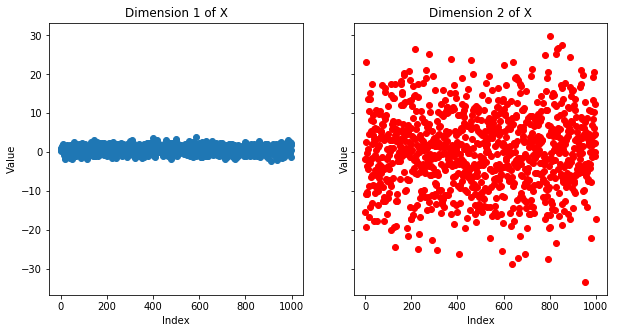

In [6]:
# initialize a 2x1 figure for plotting
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# plot the first dimension of X on the left
ax1.scatter(idx, X[:, 0])
ax1.set_title("Dimension 1 of X")
ax1.set_xlabel("Index")
ax1.set_ylabel("Value")

# plot the second dimension of X on the right
ax2.scatter(idx, X[:, 1], c='r')
ax2.set_title("Dimension 2 of X")
ax2.set_xlabel("Index")
ax2.set_ylabel("Value")

# display the plot
plt.show()

Here we can see how different the two dimensions are. Both dimensions are centered at 0 (to be exact, they are centered at 0.5). However, the first dimension spreads out _very little_ while the second dimension spreads out _a lot_. We typically use these two properties to broadly describe data: the center of the data is the __mean__ and the spread is called the __variance__. Later on in the course we will see why the above result -- features in a dataset with different variance -- matters when designing a machine learning system.

But for now, let's continue to explore this type of data. We'll put this plotting code into a single function so that we can repeat and experiment with this process easily.

In [7]:
# define a function to generate and plot a random dataset
def gen_vis_data(num_samples, colors=['b','r'], mean=[0.5,0.5], cov=[[1,0],[0,100]]):
    """
    Generates num_samples random data from a distribution and 
    plots each dimension in a separate plot.
    
    Args:
    num_samples: Number of samples to be generated. 
    colors (optional): The colors for the different plots.
    """
    # generate random dataset
    X = random_data(num_samples,mean,cov)
    idx = range(num_samples)

    # initialize a 2x1 figure for plotting
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

    # plot the first dimension of X on the left
    ax1.scatter(idx, X[:, 0])
    ax1.set_title("Dimension 1 of X")
    ax1.set_xlabel("Index")
    ax1.set_ylabel("Value")

    # plot the second dimension of X on the right
    ax2.scatter(idx, X[:, 1], c='r')
    ax2.set_title("Dimension 2 of X")
    ax2.set_xlabel("Index")
    ax2.set_ylabel("Value")

    # display the plot
    plt.show()

    # DONE: modify this function so that you can specify the mean and covariance of the random data

Let's test our function by generating datasets of different sizes. Whenever you write code that works with data, it's always a good idea to test it on small data first.

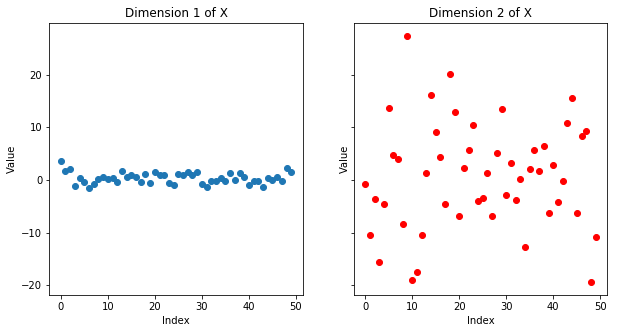

In [8]:
gen_vis_data(50)

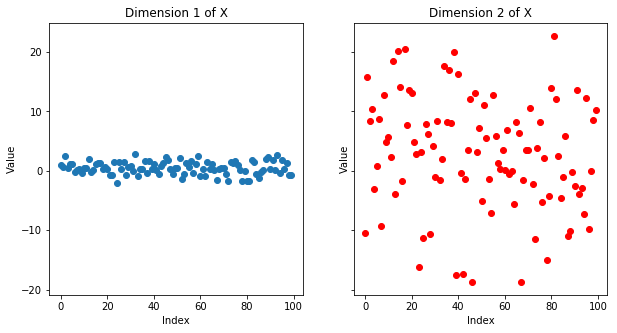

In [9]:
gen_vis_data(100)

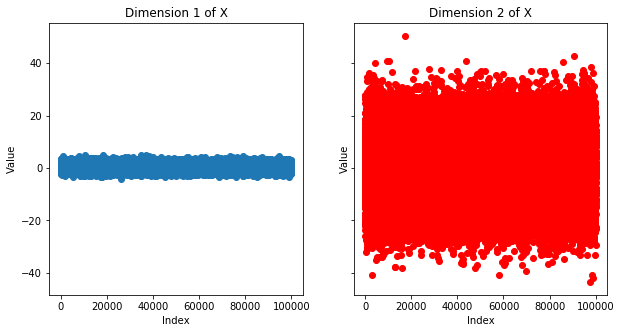

In [10]:
gen_vis_data(100000)

You can see how closely packed the samples become as the sample size increases. This is one of the main reasons why it's important to have a sufficiently large amount of data: the closer together certain samples are, the easier it is for machine learning algorithms to make sense of the entire dataset. For example, in some of the plots you can see some points lying outside the spread; these points are called _outliers_. As we increase the sample size, it becomes easier to distinguish the outliers from the rest of the data.

## Plotting Multivariate Data

So far we've visualized _univariate_ (1-dimensional) data, but now let's visualize the entire dataset. We're going to use another Python module called `seaborn`, which provides some fancier plotting functions on top of `matplotlib`. Specifically, we're going to use a function called `jointplot` to visualize _bivariate_ (2-dimensional) data.

             x          y
0     1.519632   3.009545
1    -1.318806   7.512792
2     0.208996 -12.441298
3     0.835332  -3.227731
4    -0.965293 -14.216423
5    -0.625529   2.794678
6     0.451201  -5.850635
7     0.353174   2.228217
8     0.564646 -12.926937
9     2.202075 -19.280068
10   -0.046663   8.435433
11    0.593380   2.965725
12    0.555949 -19.214011
13    2.486605  15.579957
14   -0.381026  10.890019
15   -2.126726   1.760457
16   -0.028778   3.214339
17    1.697250  -0.606710
18   -0.396885  12.476661
19    2.935658 -13.672730
20    2.823455   2.338162
21   -1.156416   6.109969
22   -0.645261   0.389387
23    1.042975  -4.937858
24   -0.056456  11.924971
25    0.337777   6.765635
26    1.108443  13.840846
27    1.342993   9.990433
28    1.254595   2.025848
29    0.778603 -13.520779
...        ...        ...
9970  0.989654  18.031640
9971  0.151132 -14.156608
9972  2.857660  -1.780550
9973  1.758559  -7.325217
9974  0.071860   5.777569
9975 -0.961007   9.733023
9976  1.0967

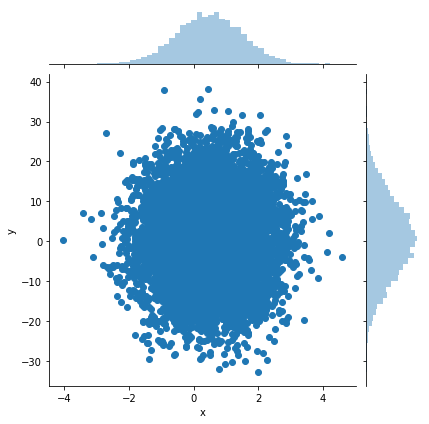

In [11]:
# generate a 2-D dataset
X = random_data(10000)

# create a pandas dataframe with the data and column names
df = pd.DataFrame(X, columns=["x", "y"])

# show the dataframe
print(df)

# plot the dataset with seaborn
sns.jointplot(x="x", y="y", data=df)
plt.show()

This looks cool! We essentially just collapsed the two plots from before into one. The `jointplot` function creates a `JointGrid`, which is actually three plots in one: the scatter plot, and two histograms for each of the individual dimensions. We also introduced something called a `DataFrame`, which is a structure that allows us to completely represent a dataset by storing both data and row/column names. This way we can name the dimensions in our dataset to make them more meaningful.

## The Iris Dataset

Now that we've seen how to generate and visualize random data, let's move on to the famous Iris dataset. Widely considered to be the "Hello World" for datasets, the Iris dataset was created in the early 1900's by the British statistician and biologist Ronald Fisher. This dataset has four features, which correspond to different measurements of an Iris flower, and 150 samples, which correspond to individual flowers. The dataset also has __labels__ or __targets__ associated with the data; that is, each sample is labeled according to its species.

In [12]:
# load the Iris dataset
iris = sklearn.datasets.load_iris()

# show dataset shape
print("Iris data: (%d, %d)" % iris.data.shape)
print("Iris targets: (%d,)" % iris.target.shape)

# show feature names
print("Feature names: ", iris.feature_names)

# show label names
print("Label names: ", iris.target_names)

Iris data: (150, 4)
Iris targets: (150,)
Feature names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Label names:  ['setosa' 'versicolor' 'virginica']


As we can see, the "shape" of the data denotes the number of samples and features, respectively, in the data. We can think of this dataset as an Excel spreadsheet with 150 rows and 4 columns with values, with an extra column for the labels. Even the smallest machine learning systems typically use datasets with thousands of samples (if not more) and any number of features depending on the application. Using the tools we've developed so far, we can at least visualize any 2 dimensions of a dataset.

Now, let's load just a slice of the dataset and see what it looks like. As before we'll write code for a specific example and then we'll put it into a function so that we can repeat it.

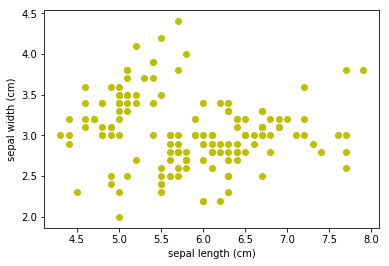

In [13]:
# load the Iris dataset
iris = sklearn.datasets.load_iris()

# extract the first two dimensions
iris_reduced = iris.data[:, 0:2]

# plot first two dimensions
plt.scatter(iris_reduced[:, 0], iris_reduced[:, 1], c="y")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

As you can see, the distribution of this data is much more... interesting... than that of the random data from before. In reality, most real-world data is much more complex, which makes plots like these all the more important for understanding our data and using the right machine learning algorithms. This plot, for example, shows us that there seems to be two clusters of data above and below, and that we could probably draw a straight line to separate the two clusters. A dataset with this property is called _linearly separable_ since it can be cleanly separated into groups by one or more straight lines.

As an excercise, plot the 1st and 3rd dimension using the code above. The third dimension is simply `iris.data[:, 2]`. Write your code in the cell below and then hit `Shift+Enter` to see the result. 

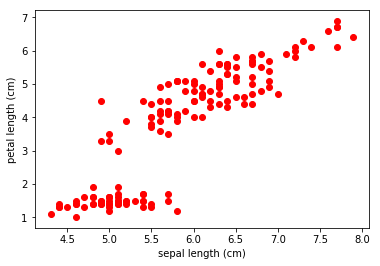

In [17]:
iris = sklearn.datasets.load_iris()

# DONE: plot the 1st and 3rd dimensions of the Iris dataset

# load the Iris dataset
iris = sklearn.datasets.load_iris()

# extract the first and third dimension
iris_reduced_0 = iris.data[:, 0]
iris_reduced_2 = iris.data[:, 2]

# plot first and third dimensions
plt.scatter(iris_reduced_0, iris_reduced_2, c="r")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.show()

Now, let's write a function that will allow us to plot any two dimensions against each other:

In [24]:
def plot_iris_2d(iris, columns=[0, 1]):
    """
    Plots the Iris dataset with given list of column indices.
    Only the first two column indices are used.
    
    Args:
    iris: Iris dataset loaded from sklearn
    columns: The column indices. By default it'll plot the first and second dimension.
    """

    # extract x and y axes
    x, y = iris.data[:, columns[0]], iris.data[:, columns[1]]

    # plot x and y
    plt.scatter(x, y, c=iris.target)
    plt.xlabel(iris.feature_names[columns[0]])
    plt.ylabel(iris.feature_names[columns[1]])
    plt.legend()
    plt.show()
    

    # TODO: add a legend to the scatter plot

No handles with labels found to put in legend.


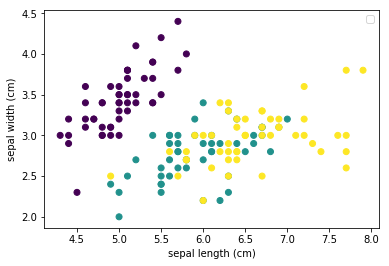

In [27]:
plot_iris_2d(iris)

In [ ]:
plot_iris_2d(iris, [0, 2])

In [ ]:
plot_iris_2d(iris, [0, 3])

In [ ]:
plot_iris_2d(iris, [1, 2])

Whoa... why are there colors all of a sudden? If you look at our plotting function you'll see that we tweaked the call to `plt.scatter()` so that it would color samples by their label. That is, instead of providing a single color code like `"y"`, we can provide a list of color codes or even just numbers, and `matplotlib` will color each sample accordingly. In this case we provided the labels array so `matplotlib` simply picked three colors for each flower species.

Adding color also shows us that the data isn't quite as linearly separable as we thought. In particular, while one of the species is separated pretty well, the other two species are consistently mangled together. What does this mean for us when designing a machine learning system for this data? It means that for whatever task we try to do with this data, such as classification or clustering, any machine learning algorithm we use will probably have more difficulty telling these two species apart.

It looks like there are a lot of "angles" from which we can view the Iris dataset, but no single plot provides a complete view. However, `seaborn` has another supercharged plotting feature that is perfect for this kind of dataset, called `PairGrid`:

In [ ]:
# load the Iris dataset (from seaborn)
iris = sns.load_dataset("iris")

# plot PairGrid showing 1-D histograms and 2-D scatter plots
g = sns.PairGrid(iris, hue="species")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

# TODO: change the lower half of the PairGrid to KDE plots (see sns.kdeplot)

As we can see, `PairGrid` is _really_ powerful because it essentially allows us to see a lot of angles all at once. It's also very configurable; we can "map" the diagonal, upper, and lower halves each to a separate plotting function, and in this case we can color the data by label and add a legend with little effort. The only downside is that `PairGrid` does not scale well to large datasets; as you increase the number of features (the Iris dataset only has four), the number of plots increases rapidly. You can still use `PairGrid` with a large dataset by selecting only a few features from the dataset.

To learn more about what all seaborn can do, check out the [examples gallery](http://seaborn.pydata.org/examples/) and the API docs on the seaborn website.

Let's look again at this issue of separability. It's clear that these two species (which we can identify as `versicolor` and `virginica` thanks to the legend) are stuck together, and any machine learning algorithm we throw at the data will have a hard time distinguishing these two. How can we deal with this problem? The primary way to make data easier to separate is to __add more features__; in other words, add a third or fourth axis along which we might be able to separate the two classes. Now we can't go back to 1936 and tell Ronald Fisher to add more types of measurements, but remember that __we're only looking at two dimensions at a time__. For any given scatter plot above there are two dimensions being excluded, which means that `versicolor` and `virginica` may in fact be separable if we just use the entire dataset instead of only two dimensions. We will revisit this question later when we begin to look at machine learning algorithms.

## Assignment: Understand Your Data

The Iris dataset is one of the simplest datasets around, so it's really easy to understand from just a few visualizations. To practice your data-wrangling skills, pick one of the toy datasets from [scikit-learn](http://scikit-learn.org/stable/datasets/index.html#toy-datasets) or [seaborn](http://seaborn.pydata.org/generated/seaborn.load_dataset.html#seaborn.load_dataset) and create some visualizations that help you understand the data. Some good visualizations to get started include:
- heatmaps
- histograms / violinplots / kde plots
- bar plots
- pairwise scatter plots
- regression plots

`seaborn` provides all of these methods and more, and the [examples gallery](http://seaborn.pydata.org/examples/) is a great way to learn about them. Keep in mind that each type of visualization can be used in multiple ways, and some visualizations are more useful than others for a particular dataset.

As you examine your dataset of choice, here are some basic questions to ask yourself:
- How many __samples__ are in the dataset? How many __features__? How many __labels__?
- Can you tell the difference between the features and the labels?
- What is the __mean__ and __variance__ of each feature? More broadly, which features are "spread out" more?
- Are any of the features __correlated__ with each other, or otherwise related in some interesting way?
- Is the data __separable__? That is, is it easy to visually separate the data by labels?

If you can visualize and understand one of these toy datasets, great! Try some of the other datasets! Every dataset is unique and will probably teach you something new about how to understand data through visualization.

In [ ]:
# TODO: load and visualize another toy dataset

## Epilogue: Loading Data from the Filesystem

It's easy to load data on-demand from scikit-learn or seaborn, but eventually you'll need to know how to load real data from the filesystem. Here we'll show you quickly how to load multivariate data from a CSV file and image data.

### Multivariate Data

Multivariate data such as Iris is usually stored in a __comma-separated values (CSV)__ file. A CSV file is like an Excel spreadsheet -- each row is on a line, and each column is separated by a comma. In fact, you can load CSV files directly into Excel and view them. In Python, we will use the `read_csv` function in pandas to load CSV files. Here's an example where we load the Iris dataset directly from the filesystem:

In [ ]:
# download the CSV file from the Internet
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
!ls

In [ ]:
# if your CSV file doesn't provide column names, you can provide them yourself
names = [
    "sepal length (cm)",
    "sepal width (cm)",
    "petal length (cm)",
    "petal width (cm)",
    "target"
]

# we'll save them to a file and then load them back so you can see what it looks like
np.savetxt("iris.names", names, fmt="%s")

names = np.loadtxt("iris.names", dtype=str, delimiter=",")

iris = pd.read_csv("iris.data", header=None, names=names)

iris

In [ ]:
# separate the dataset into data and labels
X = iris.iloc[:, 0:4]
y = iris["target"]

print(X)
print(y)

### Image Data

Image data is a bit more complicated to manage. Whereas multivariate data is typically stored in a single CSV file, even a large file, we typically store images in individual files so that we can view them easily. We can still load an image dataset into a single numpy array, but we'll need to interact with the file-system a bit more. In this example we'll use the [Digits dataset](https://scikit-learn.org/stable/datasets/index.html#digits-dataset) from `sklearn`. Since the dataset comes pre-packaged in a numpy array, we'll save the data as individual images and then load it back, so that you see both ways.

In [ ]:
# load the digits dataset from sklearn
digits = sklearn.datasets.load_digits()

X = digits.data
y = digits.target
classes = digits.target_names

# convert data to uint8
X = X.astype(np.uint8)

# reshape data to be 8x8
X = X.reshape(X.shape[0], 8, 8)

# print information about dataset
print("X shape:", X.shape)
print("y shape:", y.shape)
print("classes:", classes)

In [ ]:
# remove previous directory tree
!rm -rf digits

# create directory tree for digits dataset
os.mkdir("digits")

for c in classes:
    os.mkdir("digits/%s" % c)

# save each image to a pgm file in class sub-directory
for i in range(len(X)):
    fname = "digits/%s/%04d.pgm" % (classes[y[i]], i)
    skimage.io.imsave(fname, X[i])

You should now have the digits dataset in a directory called "digits" with the following directory structure:
```
digits/
    0/
        0000.pgm
        ...
    1/
    2/
    ...
    9/
```

List the directory to see for yourself:

In [ ]:
!ls -lR digits

Organizing images by class is one of the most common ways to store an image dataset. That way you can infer the label for each image directory from the it's parent directory. Note however that your image dataset may have multiple labels (for example, face images labelled by person and other attributes such as age, gender, emotion, etc), so you must make sure to group images by the label type that you are using.

Now that we have a good example dataset in the filesystem, let's load it back in as if it were a new dataset. The code is actually quite similar to what we just did.

In [ ]:
# infer class names from the sub-directory names
classes = os.listdir("digits")

# initialize empty data array and label array
num_samples = 1797
X = np.empty((num_samples, 8, 8), dtype=np.uint8)
y = np.empty((num_samples,), dtype=np.int64)

# TODO: can you determine num_samples automatically?
# TODO: how about the image size?

# iterate through sub-directories
i = 0

for c in classes:
    # get list of images in class c
    filenames = os.listdir("digits/%s" % c)
    filenames = ["digits/%s/%s" % (c, f) for f in filenames]
    
    # load each image into numpy array
    for fname in filenames:
        X[i] = skimage.io.imread(fname)
        y[i] = int(c)
        i += 1

print(X)
print(y)

If we compare the data that we loaded to the original data from `sklearn`, it won't match exactly because our data is ordered by class. So it's the same data but ordered differently:

In [ ]:
print(X.mean() - digits.data.mean())
print(y.mean() - digits.target.mean())